###Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
#setting dataset on Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Preprocessing

In [4]:
ds = pd.read_csv('/content/drive/MyDrive/datasets/car_data.csv')

In [5]:
ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
ds.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
ds.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
for col in ['Year', 'Fuel_Type', 'Seller_Type', 'Transmission','Owner']:
  print('===============\n{}:\n{}\n'.format(col,ds[col].value_counts()))

Year:
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2007     2
2003     2
2018     1
2004     1
Name: Year, dtype: int64

Fuel_Type:
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Seller_Type:
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

Transmission:
Manual       261
Automatic     40
Name: Transmission, dtype: int64

Owner:
0    290
1     10
3      1
Name: Owner, dtype: int64



####Encoding categorical data

In [21]:
ds.replace({'Fuel_Type':{
            'Petrol':0,
            'Diesel':1,
            'CNG':2}}, inplace=True)

(None,)

In [27]:
ds.replace({'Seller_Type':{
               'Dealer':0,
               'Individual':1}},
            inplace=True)

In [24]:
ds.replace({'Transmission':{
               'Manual':0,
               'Automatic':1}},
           inplace=True)

In [28]:
ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [29]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [31]:
for col in ['Fuel_Type', 'Seller_Type', 'Transmission']:
  print('===============\n{}:\n{}\n'.format(col,ds[col].value_counts()))

Fuel_Type:
0    239
1     60
2      2
Name: Fuel_Type, dtype: int64

Seller_Type:
0    195
1    106
Name: Seller_Type, dtype: int64

Transmission:
0    261
1     40
Name: Transmission, dtype: int64



In [37]:
#splitting data
X=ds.drop(['Car_Name','Selling_Price'], axis=1)
Y=ds['Selling_Price']

In [38]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [39]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [47]:
print('Dataset shape: {}\nX shape: {}\nY Shape: {}'.format(ds.shape,X.shape,Y.shape))

Dataset shape: (301, 9)
X shape: (301, 7)
Y Shape: (301,)


In [48]:
#splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

###Model training

####Linear Regression

In [49]:
lin_reg_model=LinearRegression()

In [50]:
lin_reg_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

####Lasso Regresion

In [55]:
lasso_reg_model = Lasso()

In [56]:
lasso_reg_model.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

###Model evaluation

####Linear Regression

In [53]:
#predicting
lin_reg_pred = lin_reg_model.predict(x_test)

#R squared error
lin_reg_rscore = metrics.r2_score(y_test, lin_reg_pred)
print('R^2 error: ', lin_reg_rscore)

R^2 error:  0.8468145727628755


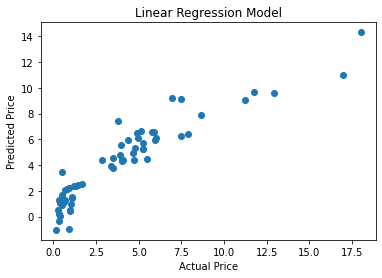

In [58]:
#visualizing the actual prices and predicted prices
plt.scatter(y_test, lin_reg_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression Model')
plt.show()

####Lasso Regression

In [57]:
#predicting
lasso_reg_pred = lasso_reg_model.predict(x_test)

#R squared error
lasso_reg_score = metrics.r2_score(y_test, lasso_reg_pred)
print('R^2 error: ', lasso_reg_score)

R^2 error:  0.7863200842627052


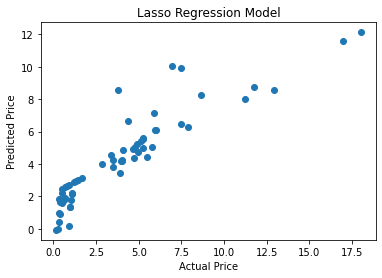

In [59]:
#visualizing the data
plt.scatter(y_test, lasso_reg_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Lasso Regression Model')
plt.show()

###Acknowledgements
<p><b>Vehicle dataset from Kaggle</b>: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv<p>
<p><b>Project 7. Car Price Prediction using Machine Learning with Python</b>: https://www.youtube.com/watch?v=L3OtLaCbJC8</p>